In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('/content/sales_data_with_discounts.csv')

In [6]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [7]:
df.shape

(450, 13)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
print(df.dtypes)

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object


In [10]:
cols=df.select_dtypes(['int','float']).columns

In [11]:
cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

mean

In [12]:
df[cols].mean()

,0
Volume,5.066667
Avg Price,10453.433333
Total Sales Value,33812.835556
Discount Rate (%),15.155242
Discount Amount,3346.499424
Net Sales Value,30466.336131


median

In [13]:
df[cols].median()

,0
Volume,4.000000
Avg Price,1450.000000
Total Sales Value,5700.000000
Discount Rate (%),16.577766
Discount Amount,988.933733
Net Sales Value,4677.788059


mode

In [14]:
df[cols].mode()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


Standard Deviation

In [15]:
df[cols].std()

,0
Volume,4.231602
Avg Price,18079.904840
Total Sales Value,50535.074173
Discount Rate (%),4.220602
Discount Amount,4509.902963
Net Sales Value,46358.656624


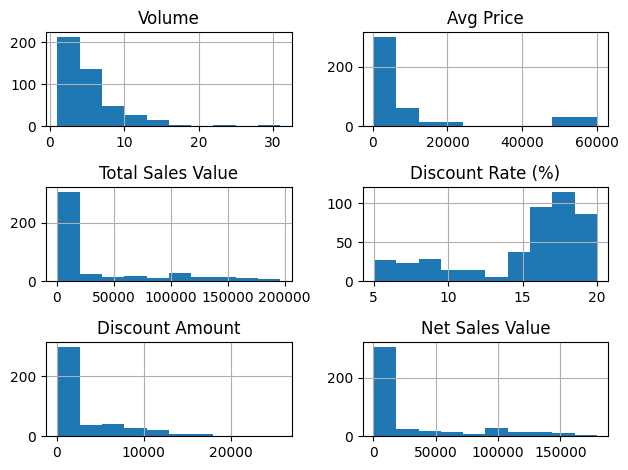

In [16]:
df.hist()
plt.tight_layout()
plt.show()

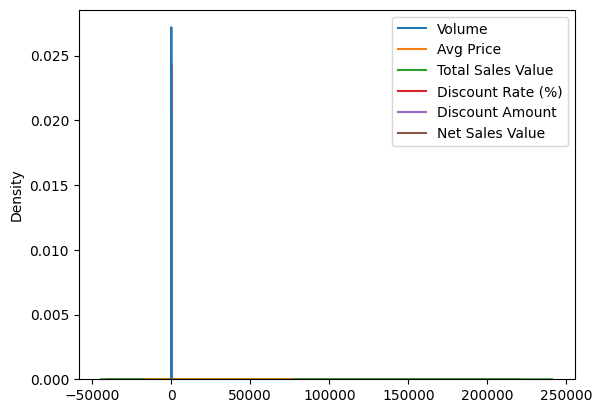

In [17]:
sns.kdeplot(data=df)
plt.show()

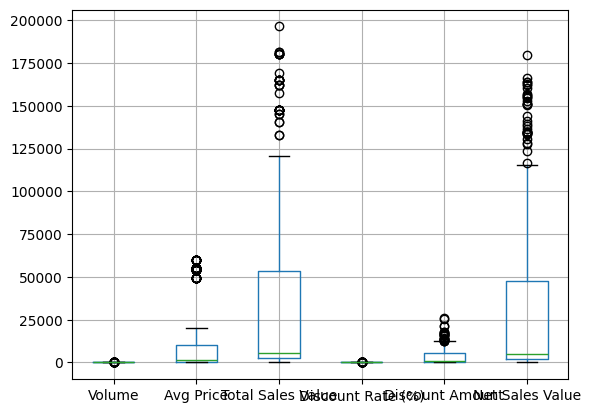

In [18]:
df.boxplot()
plt.show()

In [19]:
def outlier_capping(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)
  iqr= q3-q1
  lower_extreme= q1-1.5*iqr
  upper_extreme= q3+1.5*iqr
  df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
  outlier_capping(df,col)

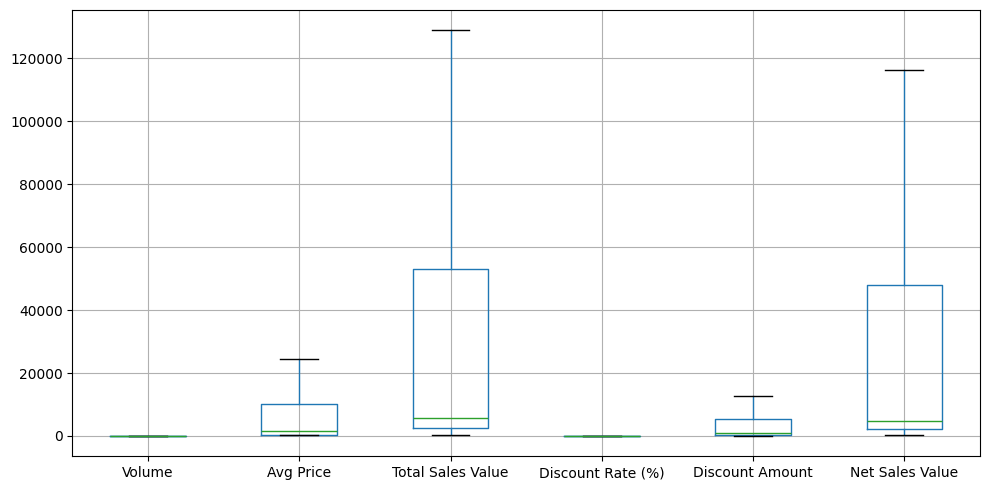

In [20]:
df.boxplot(figsize=(10,5))
plt.tight_layout()
plt.show()


In [21]:
cols1=df.select_dtypes(['object']).columns
cols1

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

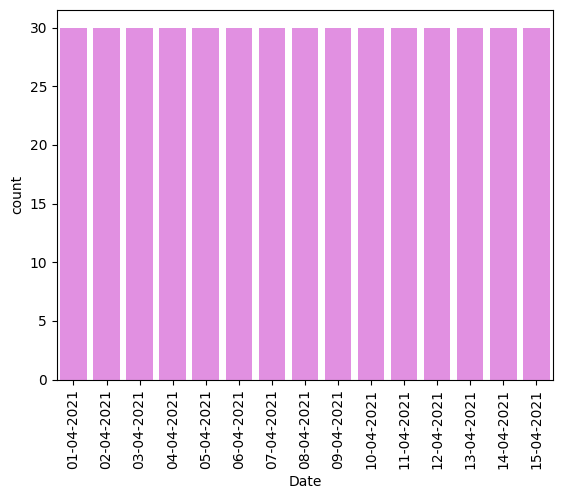

In [22]:
a=sns.countplot(data=df,x='Date',color='violet')
plt.xticks(rotation=90)
plt.show()

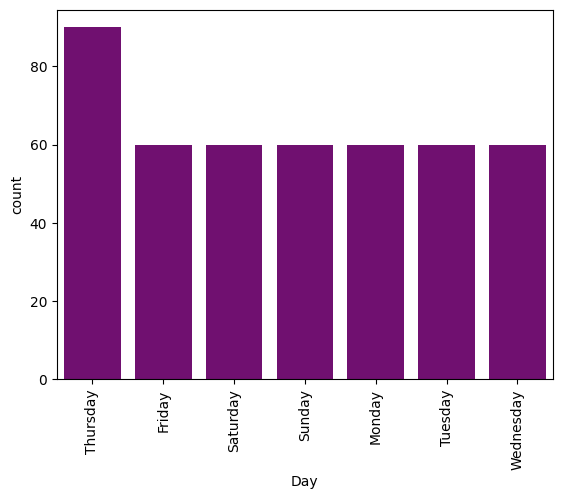

In [23]:
a=sns.countplot(data=df,x='Day',color='purple')
plt.xticks(rotation=90)
plt.show()

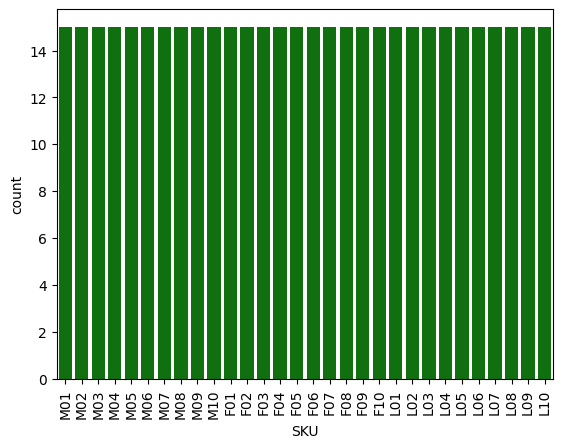

In [24]:
a=sns.countplot(data=df,x='SKU',color='green')
plt.xticks(rotation=90)
plt.show()

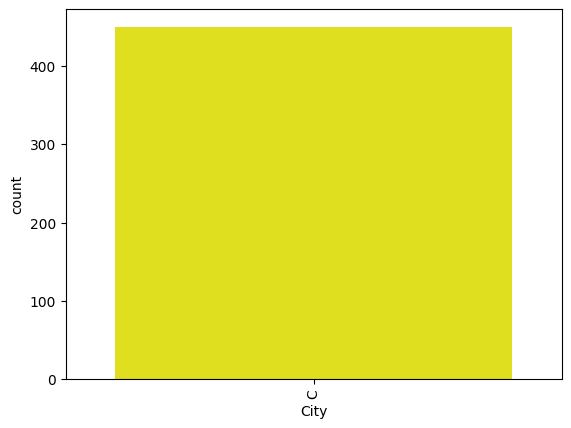

In [25]:
a=sns.countplot(data=df,x='City',color='yellow')
plt.xticks(rotation=90)
plt.show()

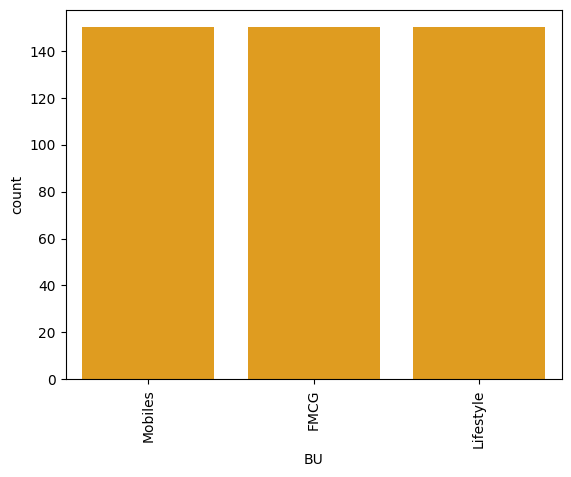

In [26]:
a=sns.countplot(data=df,x='BU',color='orange')
plt.xticks(rotation=90)
plt.show()

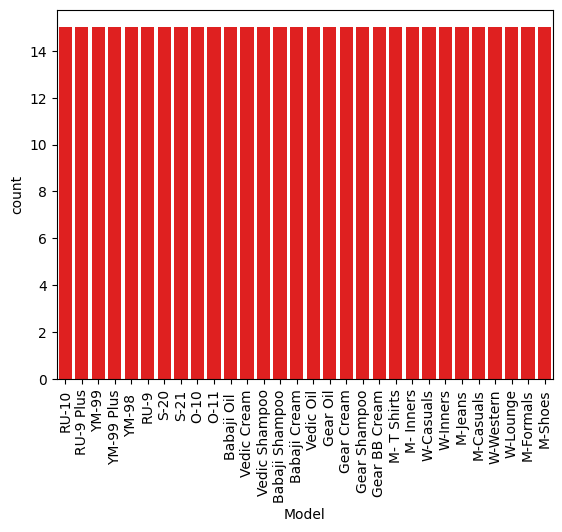

In [27]:
a=sns.countplot(data=df,x='Model',color='red')
plt.xticks(rotation=90)
plt.show()

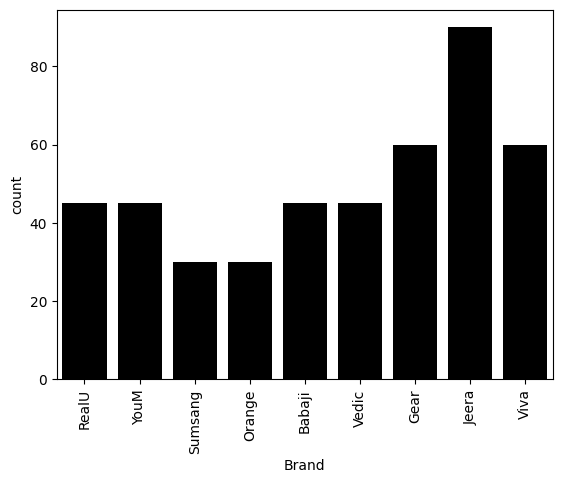

In [28]:
a=sns.countplot(data=df,x='Brand',color='black')
plt.xticks(rotation=90)
plt.show()